 # Libraries

In [1]:
# For IPython/Jupyter environments
from IPython import get_ipython
get_ipython().magic("matplotlib inline")

In [2]:
from sklearn import datasets
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

sns.set(rc={"figure.figsize": (16, 8), "font.size": 22})

random_seed = 23
np.random.seed(random_seed)

In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

 # The Iris dataset

In [4]:
iris = datasets.load_iris()

features = iris["data"]
feature_names = iris.feature_names
labels = iris["target"]
label_names = iris.target_names

iris_data = pd.concat(
    [
        pd.DataFrame(features, columns=feature_names),
        pd.Series(labels)
        .rename("labels")
        .map({i: label for i, label in enumerate(label_names)}),
    ],
    axis=1,
)
iris_data.sample(5, random_state=random_seed)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),labels
139,6.9,3.1,5.4,2.1,virginica
125,7.2,3.2,6.0,1.8,virginica
67,5.8,2.7,4.1,1.0,versicolor
3,4.6,3.1,1.5,0.2,setosa
113,5.7,2.5,5.0,2.0,virginica


Text(0.5, 1.0, 'Iris type by petal length and width')

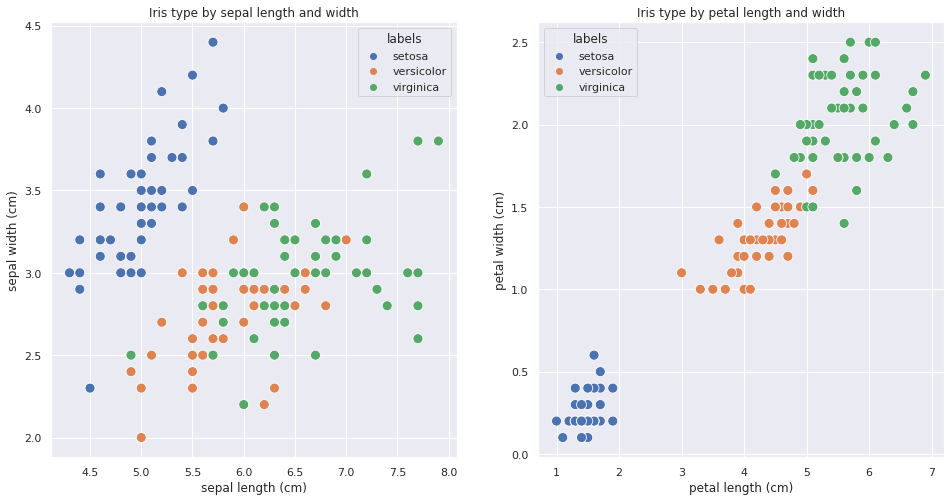

In [5]:
fig, axes = plt.subplots(1, 2)

sns.scatterplot(
    data=iris_data,
    x="sepal length (cm)",
    y="sepal width (cm)",
    hue="labels",
    s=100,
    ax=axes[0],
).set_title("Iris type by sepal length and width")

sns.scatterplot(
    data=iris_data,
    x="petal length (cm)",
    y="petal width (cm)",
    hue="labels",
    s=100,
    ax=axes[1],
).set_title("Iris type by petal length and width")

In [6]:
iris_binary = iris_data[iris_data["labels"].isin(["setosa", "virginica"])]
iris_binary_sepal = iris_binary.loc[:, ["sepal width (cm)", "labels"]]
iris_binary_sepal.sample(5, random_state=random_seed)

,sepal width (cm),labels
26,3.4,setosa
130,2.8,virginica
132,2.8,virginica
118,2.6,virginica
127,3.0,virginica


 # Binary Classification

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    iris_binary_sepal.drop(columns="labels"),
    iris_binary_sepal.loc[:, "labels"],
    train_size=0.8,
    random_state=random_seed,
)

In [8]:
model = DecisionTreeClassifier(random_state=random_seed)


def get_prediction_results(X_train, y_train, y_test, model):
    predictions = model.fit(X_train, y_train).predict(X_test)
    return pd.concat(
        [
            pd.Series(y_test).rename("Ground truth"),
            pd.Series(predictions, index=y_test.index).rename("Prediction"),
            (predictions == y_test).rename("Prediction success"),
        ],
        axis=1,
    )


prediction_results = get_prediction_results(X_train, y_train, y_test, model)
prediction_results

,Ground truth,Prediction,Prediction success
26,setosa,setosa,True
130,virginica,virginica,True
132,virginica,virginica,True
118,virginica,virginica,True
127,virginica,virginica,True
37,setosa,setosa,True
3,setosa,setosa,True
105,virginica,virginica,True
20,setosa,setosa,True
17,setosa,setosa,True


In [9]:
prediction_results["Prediction success"].sum() / prediction_results[
    "Prediction success"
].count()

0.7

In [10]:
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=random_seed),
    "Logistic Regression": LogisticRegression(random_state=random_seed),
    "K-Neighbors": KNeighborsClassifier(),
}

scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


def get_accuracy(X_train, y_train, model):
    prediction_results = get_prediction_results(X_train, y_train, y_test, model)
    return prediction_results["Prediction success"].mean()


for name, model in models.items():
    print(name, get_accuracy(X_train, y_train, model))

Decision Tree 0.7
Logistic Regression 0.8
K-Neighbors 0.75


 # The Accuracy Paradox

 Classification with imbalanced data using the Wisconsin cancer data set.

In [11]:
cancer = datasets.load_breast_cancer()

features = cancer["data"]
feature_names = cancer.feature_names
labels = cancer["target"]
label_names = cancer.target_names

cancer_data = pd.concat(
    [
        pd.DataFrame(features, columns=feature_names),
        pd.Series(labels)
        .rename("labels")
        .map({i: label for i, label in enumerate(label_names)}),
    ],
    axis=1,
)
cancer_data.sample(5, random_state=random_seed)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,labels
155,12.25,17.94,78.27,460.3,0.08654,0.06679,0.03885,0.02331,0.1970,0.06228,...,25.22,86.6,564.2,0.1217,0.1788,0.1943,0.08211,0.3113,0.08132,benign
541,14.47,24.99,95.81,656.4,0.08837,0.12300,0.10090,0.03890,0.1872,0.06341,...,31.73,113.5,808.9,0.1340,0.4202,0.4040,0.12050,0.3187,0.10230,benign
202,23.29,26.67,158.90,1685.0,0.11410,0.20840,0.35230,0.16200,0.2200,0.06229,...,32.68,177.0,1986.0,0.1536,0.4167,0.7892,0.27330,0.3198,0.08762,malignant
409,12.27,17.92,78.41,466.1,0.08685,0.06526,0.03211,0.02653,0.1966,0.05597,...,28.88,89.0,610.2,0.1240,0.1795,0.1377,0.09532,0.3455,0.06896,benign
64,12.68,23.84,82.69,499.0,0.11220,0.12620,0.11280,0.06873,0.1905,0.06590,...,33.47,111.8,888.3,0.1851,0.4061,0.4024,0.17160,0.3383,0.10310,malignant


In [12]:
cancer_data_imbalanced = pd.concat(
    [
        cancer_data[cancer_data["labels"] == "malignant"].sample(
            frac=0.1, random_state=random_seed
        ),
        cancer_data[cancer_data["labels"] == "benign"],
    ]
)
cancer_data_imbalanced = cancer_data_imbalanced.loc[:, ["mean texture", "labels"]]

cancer_data_imbalanced["labels"].value_counts(normalize=True)

benign       0.944444
malignant    0.055556
Name: labels, dtype: float64

In [13]:
cancer_data_imbalanced.sample(5, random_state=random_seed)

,mean texture,labels
357,16.21,benign
518,18.22,benign
299,23.09,benign
125,17.21,benign
520,13.90,benign


In [14]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer_data_imbalanced.drop(columns="labels"),
    cancer_data_imbalanced.loc[:, "labels"],
    train_size=0.8,
    random_state=random_seed,
)

In [15]:
model = DecisionTreeClassifier(random_state=random_seed)
prediction_results = get_prediction_results(X_train, y_train, y_test, model)
prediction_results["Prediction success"].sum() / prediction_results[
    "Prediction success"
].count()

0.9473684210526315

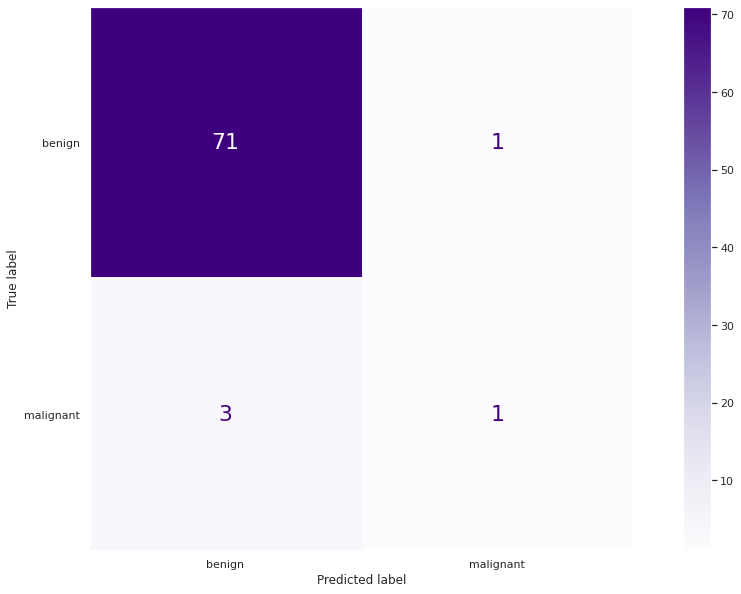

In [16]:
# pd.DataFrame(
#     confusion_matrix(
#         prediction_results["Ground truth"], prediction_results["Prediction"]
#     ),
#     columns=["predicted 'benign'", "predicted 'malignant'"],
#     index=["true 'benign'", "true 'malignant'"],
# )

cmd = ConfusionMatrixDisplay(
    confusion_matrix(
        prediction_results["Ground truth"],
        prediction_results["Prediction"],  # normalize='all'
    ),
    display_labels=model.classes_,
)
_, ax = plt.subplots(1, 1, figsize=(18, 10))
ax.grid(False)
cmd.plot(ax=ax, cmap='Purples')

 # Multi-class classification

In [17]:
iris_data_sepal = iris_data.loc[:, ["sepal width (cm)", "sepal length (cm)", "labels"]]
iris_data_sepal.sample(5, random_state=random_seed)

,sepal width (cm),sepal length (cm),labels
139,3.1,6.9,virginica
125,3.2,7.2,virginica
67,2.7,5.8,versicolor
3,3.1,4.6,setosa
113,2.5,5.7,virginica


In [18]:
X_train, X_test, y_train, y_test = train_test_split(
    iris_data_sepal.drop(columns="labels"),
    iris_data_sepal.loc[:, "labels"],
    train_size=0.8,
    random_state=random_seed,
)

In [19]:
model = DecisionTreeClassifier(random_state=random_seed)
prediction_results = get_prediction_results(X_train, y_train, y_test, model)
prediction_results["Prediction success"].mean()

0.7666666666666667

In [20]:
# pd.pivot_table(
#     prediction_results, columns='Prediction', index='Ground truth',
#     aggfunc='count', fill_value=0, margins=True
# ).droplevel(0, axis=1).div(prediction_results.shape[0])

In [21]:
# prediction_results.groupby(['Ground truth', 'Prediction']).count()

In [22]:
# prediction_results.groupby("Ground truth")["Prediction success"].mean()

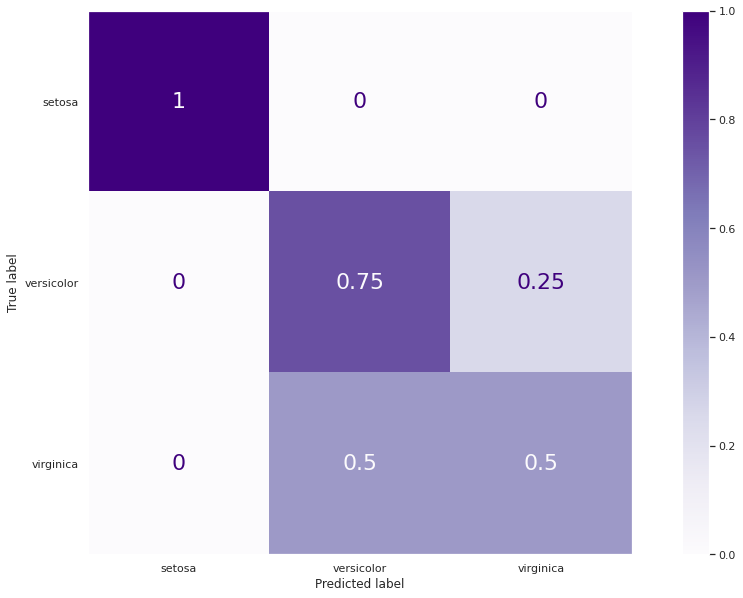

In [23]:
cmd = ConfusionMatrixDisplay(
    confusion_matrix(
        prediction_results["Ground truth"],
        prediction_results["Prediction"],
        normalize='true',
    ),
    display_labels=model.classes_,
)
_, ax = plt.subplots(1, 1, figsize=(18, 10))
ax.grid(False)
cmd.plot(ax=ax, cmap='Purples')

Text(0.5, 1.0, 'Predictions with decision tree classifier by sepal length and width')

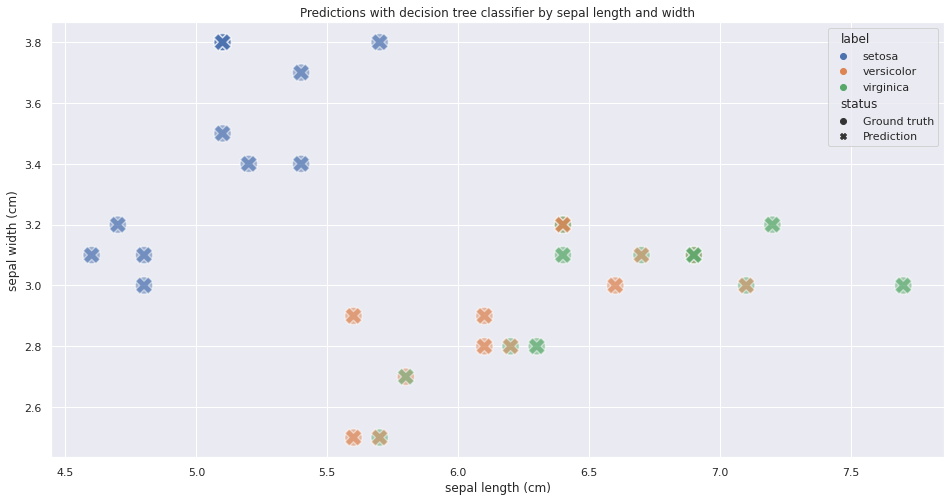

In [24]:
prediction_results_features = (
    pd.merge(
        iris_data, prediction_results, how="inner", left_index=True, right_index=True
    )
    .drop(columns="labels")
    .melt(
        id_vars=["sepal length (cm)", "sepal width (cm)"],
        value_vars=["Ground truth", "Prediction"],
        value_name="label",
        var_name="status",
    )
)

sns.scatterplot(
    data=prediction_results_features,
    x="sepal length (cm)",
    y="sepal width (cm)",
    hue="label",
    style="status",
    s=300,
    alpha=0.5,
).set_title("Predictions with decision tree classifier by sepal length and width")

 # Multi-label classification

In [25]:
rcv1 = datasets.fetch_rcv1()
rcv1_data, rcv1_target, sample_id, target_names = (
    rcv1["data"],
    rcv1["target"],
    rcv1["sample_id"],
    rcv1["target_names"],
)
samples = np.random.randint(0, rcv1_data.shape[0], 1000)
rcv1_data_sample = rcv1_data[samples]
rcv1_target_sample = rcv1_target[samples]
rcv1_data_sample.shape, rcv1_target_sample.shape

((1000, 47236), (1000, 103))

In [26]:
X_train, X_test, y_train, y_test = train_test_split(
    rcv1_data_sample.toarray(),
    rcv1_target_sample.toarray(),
    train_size=0.8,
    random_state=random_seed,
)

In [27]:
model = DecisionTreeClassifier(random_state=random_seed)
predictions = model.fit(X_train, y_train).predict(X_test)
predictions

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [28]:
(y_test == predictions).mean()

0.9679126213592233

 Hamming score or Overall Accuracy or
 $\\ \frac {1} {n} \sum_{i=1}^{n} \frac {|Y_i \cap Z_i|} {|Y_i \cup Z_i|}$

In [29]:
def hamming_score(y_test, predictions):
    return (
        (y_test & predictions).sum(axis=1) / (y_test | predictions).sum(axis=1)
    ).sum() / predictions.shape[0]


hamming_score(y_test, predictions)

0.42860930735930736

In [30]:
a = np.random.randint(0, 2, 10)
b = np.random.randint(0, 2, 10)
a = np.concatenate([np.full(2, 1), np.full(2, 0)])
b = np.tile(np.array([0, 1]), 2)
pd.DataFrame(
    [a, b, (a == b) * 1, a & b, a | b], index=["a", "b", "a == b", "a AND b", "a OR b"]
).T.style.hide_index().set_properties(**{"text-align": "center"})

a,b,a == b,a AND b,a OR b
1,0,0,0,1
1,1,1,1,1
0,0,1,0,0
0,1,0,0,1


 ## Exact match ratio
 Subset accuracy: the labelsets must exactly match to be 'true'


 $ \\ \frac{1}{n} \sum_{i=1}^{n} [[Y_i = Z_i]] $

In [31]:
def exact_match(y_test, predictions):
    return (y_test == predictions).all(axis=1).mean()


exact_match(y_test, predictions)

0.285

 ## Hamming loss
 $ \frac{1}{nL} \sum_{n=1}^{n} |Y_i \ne Z_i | $

In [32]:
def hamming_loss(y_test, predictions):
    return (y_test != predictions).sum().sum() / y_test.size


hamming_loss(y_test, predictions)

0.0320873786407767

 # Normalization


Train set:
    Normalized before split: [-0.5100153 -0.1700051  0.1700051 -0.8500255 -0.1700051 -0.5100153
 -0.5100153 -0.1700051]
    Normalized after split: [-0.57735027  0.57735027  1.73205081 -1.73205081  0.57735027 -0.57735027
 -0.57735027  0.57735027]

Test set:
    Normalized before split: [ 2.8900867 -0.1700051]
    Normalized after split: [10.96965511  0.57735027]



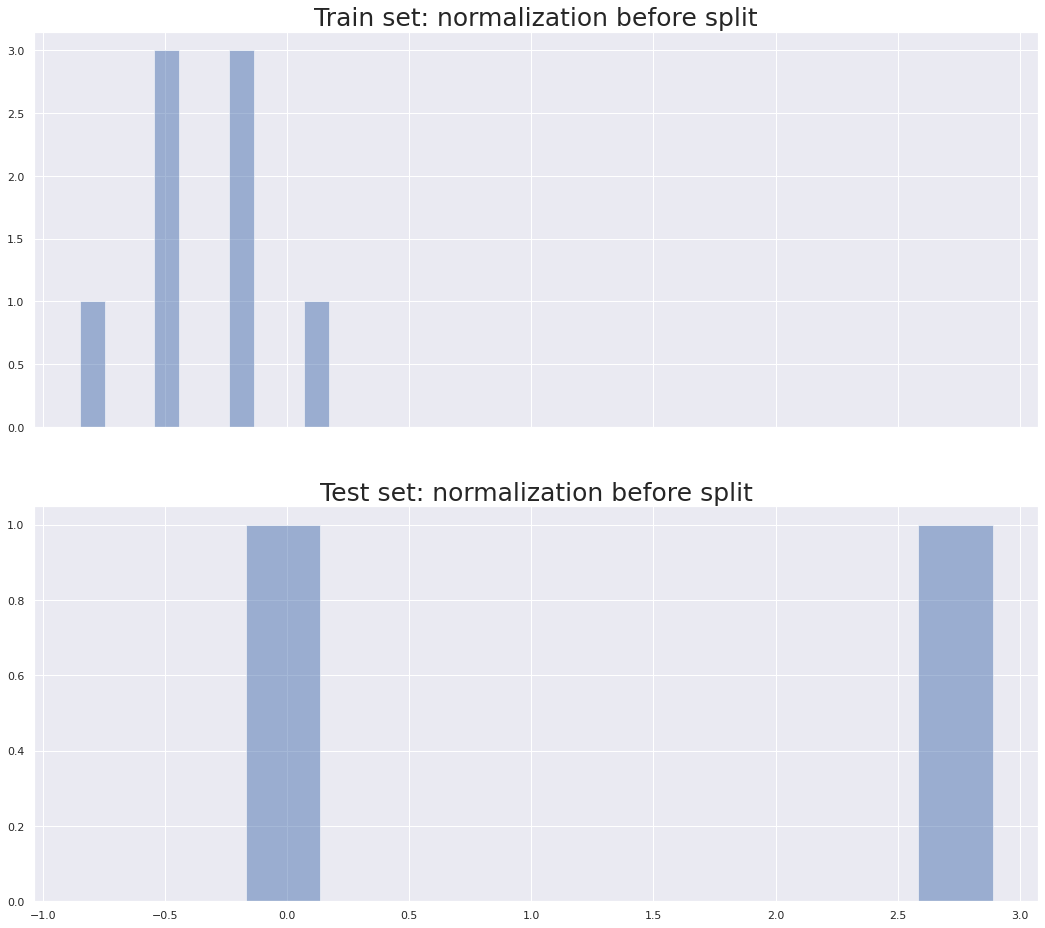

In [33]:
import numpy as np

feature = np.array([2, 3, 4, 1, 3, 2, 2, 3, 12, 3])

# Normalize before data split
mean_bef, std_bef = np.mean(feature), np.std(feature)
feature_norm_bef = (feature - mean_bef) / std_bef
train_norm_bef, test_norm_bef = feature_norm_bef[:8], feature_norm_bef[8:]

# Normalize after data split
train, test = feature[:8], feature[8:]
mean_aft, std_aft = np.mean(train), np.std(train)
train_norm_aft = (train - mean_aft) / std_aft
test_norm_aft = (test - mean_aft) / std_aft


print(
    f"""
Train set:
    Normalized before split: {train_norm_bef}
    Normalized after split: {train_norm_aft}

Test set:
    Normalized before split: {test_norm_bef}
    Normalized after split: {test_norm_aft}
"""
)

fig, axes = plt.subplots(2, 1, figsize=(18, 2 * 8), sharex=True)
axes[0].hist(
    x=train_norm_bef, alpha=0.5,
)
axes[0].set_title("Train set: normalization before split", fontsize=25)

axes[1].hist(
    x=test_norm_bef, alpha=0.5,
)
axes[1].set_title("Test set: normalization before split", fontsize=25)
plt.show()

Text(0.5, 1.0, 'Test set: normalization after split')

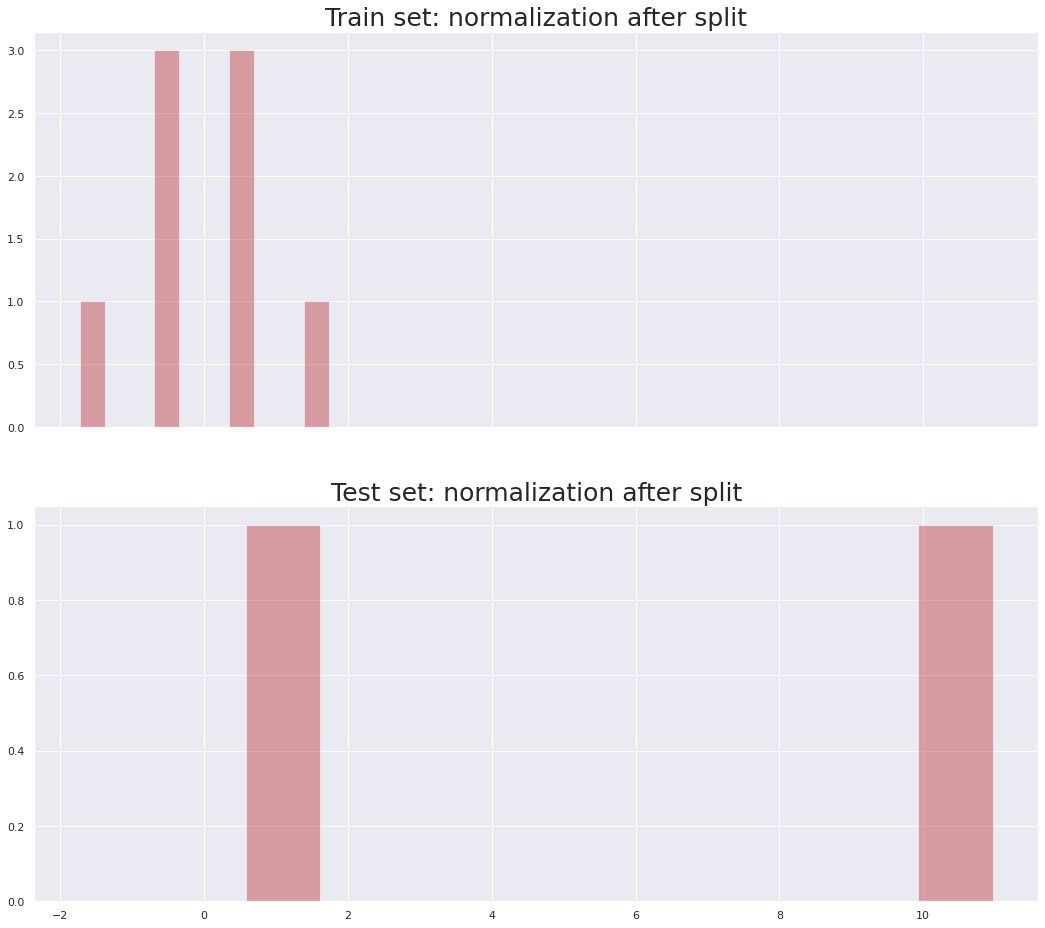

In [34]:
fig, axes = plt.subplots(2, 1, figsize=(18, 2 * 8), sharex=True)
axes[0].hist(
    x=train_norm_aft, color="r", alpha=0.5,
)
axes[0].set_title("Train set: normalization after split", fontsize=25)

axes[1].hist(
    x=test_norm_aft, color="r", alpha=0.5,
)
axes[1].set_title("Test set: normalization after split", fontsize=25)